In [48]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
import xgboost as xgb

In [49]:
# get airbnb & test csv files as a DataFrame
airbnb_df  = pd.read_csv('../data/airbnb/train_users_2.csv')
test_df    = pd.read_csv('../data/airbnb/test_users.csv')

# preview the data
airbnb_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [50]:
airbnb_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB
---------------------------

In [51]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
airbnb_df  = airbnb_df.drop(['date_account_created','timestamp_first_active'], axis=1)
test_df    = test_df.drop(['date_account_created','timestamp_first_active'], axis=1)

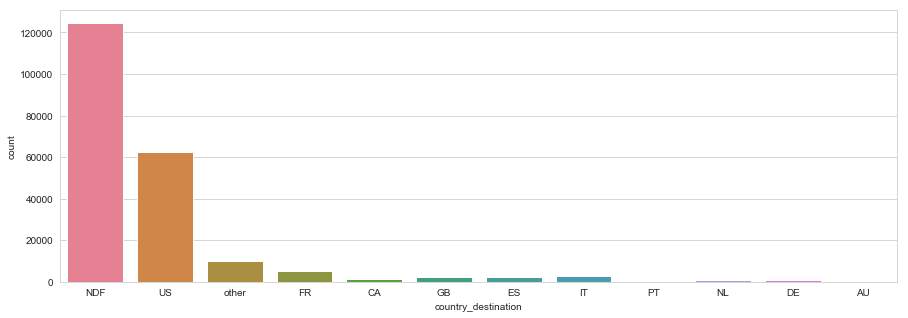

In [52]:
# country_destination

airbnb_df['booked'] = (airbnb_df['country_destination'] != 'NDF').astype(int)
# test_df['booked']   = (test_df['country_destination'] != 'NDF').astype(int)

# Plot the frequency for every country_destination value
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=airbnb_df, palette="husl", ax=axis1)

In [53]:
# date_first_booking
def get_year(date):
    if date == date: 
        return int(str(date)[:4])
    return date

def get_month(date):
    if date == date: 
        return int(str(date)[5:7])
    return date

In [54]:
# Create Year and Month columns
airbnb_df['Year']  = airbnb_df['date_first_booking'].apply(get_year)
airbnb_df['Month'] = airbnb_df['date_first_booking'].apply(get_month)

test_df['Year']  = test_df['date_first_booking'].apply(get_year)
test_df['Month'] = test_df['date_first_booking'].apply(get_month)

In [55]:
airbnb_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [56]:
# fill NaN
airbnb_df['Year'].fillna(airbnb_df['Year'].median(), inplace=True)
airbnb_df['Month'].fillna(airbnb_df['Month'].median(), inplace=True)

In [57]:
test_df['Year'].fillna(test_df['Year'].median(), inplace=True)
test_df['Month'].fillna(test_df['Month'].median(), inplace=True)

In [58]:
# convert type to integer
airbnb_df[['Year', 'Month']] = airbnb_df[['Year', 'Month']].astype(int)
test_df[['Year', 'Month']]   = test_df[['Year', 'Month']].astype(int)

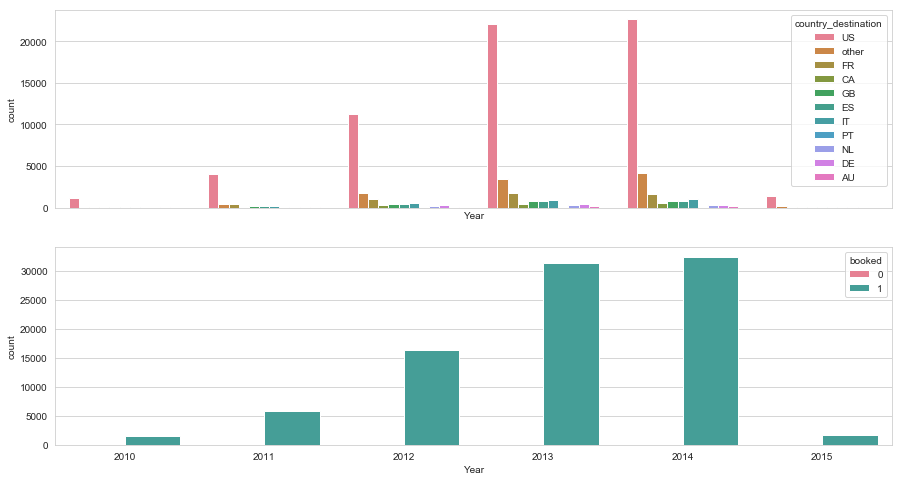

In [59]:
# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every year
sns.countplot(x="Year",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every year
# NOTICE that in year 2014, and 2015 there wasn't "no-booking"
sns.countplot(x="Year",hue="booked", data=airbnb_df, palette="husl", order=[2010,2011,2012,2013,2014,2015], ax=axis2)

In [60]:
# drop columns
airbnb_df.drop(['date_first_booking','Month'], axis=1, inplace=True)
test_df.drop(['date_first_booking','Month'], axis=1, inplace=True)

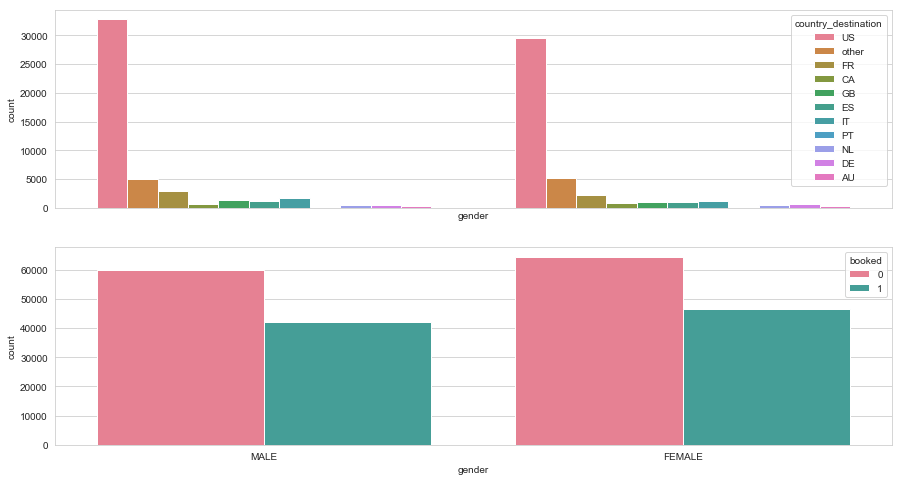

In [61]:
# gender

i = 0
def get_gender(gender):
    global i
    if gender != 'FEMALE' and gender != 'MALE':
        return 'FEMALE' if(i % 2) else 'MALE'
    i = i + 1
    return gender

# replace all values other than 'FEMALE' and 'MALE'
airbnb_df['gender'] = airbnb_df['gender'].apply(get_gender)
test_df['gender']   = test_df['gender'].apply(get_gender)

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# frequency of country_destination for every gender
sns.countplot(x="gender",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis1)

# frequency of booked Vs no-booking users for every gender
sns.countplot(x="gender",hue="booked", data=airbnb_df, palette="husl", ax=axis2)

# Map gender values to 1s and 0s
airbnb_df["gender"] = airbnb_df["gender"].map({"FEMALE": 1, "MALE": 0})
test_df["gender"]   = test_df["gender"].map({"FEMALE": 1, "MALE": 0})

# drop columns
airbnb_df.drop(['gender'], axis=1,inplace=True)
test_df.drop(['gender'], axis=1,inplace=True)

In [62]:
# age

# assign all age values > 100 to NaN, these NaN values will be replaced with real ages below
airbnb_df["age"][airbnb_df["age"] > 100] = np.NaN
test_df["age"][test_df["age"] > 100]     = np.NaN

# get average, std, and number of NaN values in airbnb_df
average_age_airbnb   = airbnb_df["age"].mean()
std_age_airbnb       = airbnb_df["age"].std()
count_nan_age_airbnb = airbnb_df["age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["age"].mean()
std_age_test       = test_df["age"].std()
count_nan_age_test = test_df["age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
airbnb_df["age"][np.isnan(airbnb_df["age"])] = rand_1
test_df["age"][np.isnan(test_df["age"])]     = rand_2

# convert type to integer
airbnb_df['age'] = airbnb_df['age'].astype(int)
test_df['age']   = test_df['age'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set o

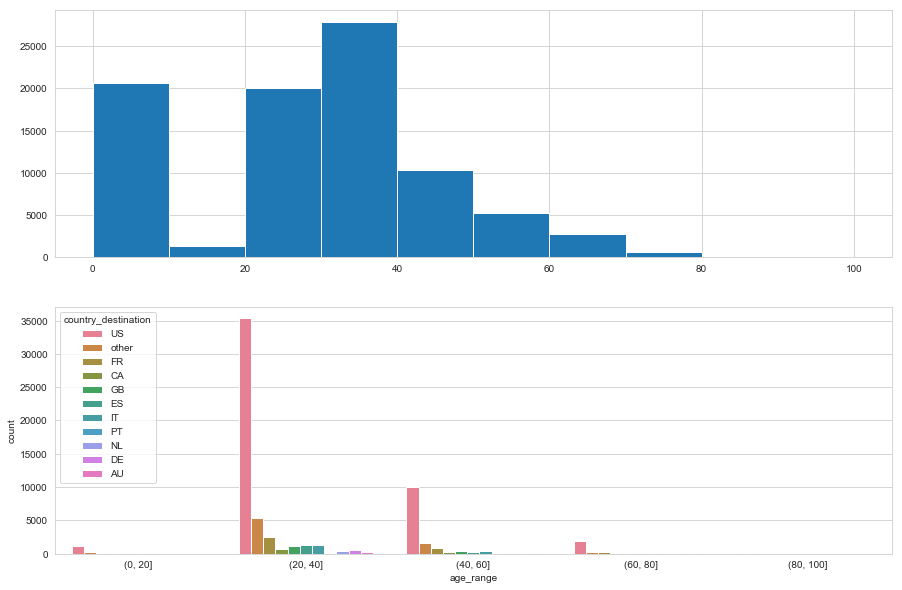

In [63]:
# .... continue with age

# Plot
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(15,10))

# frequency for age values(in case there was a booking)
airbnb_df['age'][airbnb_df['country_destination'] != 'NDF'].hist(ax=axis1)

# cut age values into ranges 
airbnb_df['age_range'] = pd.cut(airbnb_df["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=airbnb_df[airbnb_df['country_destination'] != 'NDF'], palette="husl", ax=axis2)

# drop age_range
airbnb_df.drop(['age_range'], axis=1, inplace=True)

# drop columns
airbnb_df.drop(['age'], axis=1,inplace=True)
test_df.drop(['age'], axis=1,inplace=True)

In [65]:
# first_affiliate_tracked

# fill NaN values randomly
count_first_affiliate = 7    # len(np.unique(airbnb_df["first_affiliate_tracked"].value_counts()))

count_nan_department_airbnb = airbnb_df["first_affiliate_tracked"].isnull().sum()
count_nan_department_test   = test_df["first_affiliate_tracked"].isnull().sum()

rand_1 = np.random.randint(0, count_first_affiliate, size = count_nan_department_airbnb)
rand_2 = np.random.randint(0, count_first_affiliate, size = count_nan_department_test)

range_departments_airbnb = airbnb_df['first_affiliate_tracked'].value_counts().index
range_departments_test   = test_df['first_affiliate_tracked'].value_counts().index

In [ ]:
airbnb_df["first_affiliate_tracked"][airbnb_df["first_affiliate_tracked"] != airbnb_df["first_affiliate_tracked"]] = range_departments_airbnb[rand_1]
test_df["first_affiliate_tracked"][test_df["first_affiliate_tracked"] != test_df["first_affiliate_tracked"]]       = range_departments_test[rand_2]

# drop columns
# airbnb_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)
# test_df.drop(['first_affiliate_tracked'], axis=1,inplace=True)

In [67]:
# signup_method
airbnb_df["signup_method"] = (airbnb_df["signup_method"] == "basic").astype(int)
test_df["signup_method"]   = (test_df["signup_method"] == "basic").astype(int)

# signup_flow
airbnb_df["signup_flow"] = (airbnb_df["signup_flow"] == 3).astype(int)
test_df["signup_flow"]   = (test_df["signup_flow"] == 3).astype(int)

# language
airbnb_df["language"] = (airbnb_df["language"] == 'en').astype(int)
test_df["language"]   = (test_df["language"] == 'en').astype(int)

# affiliate_channel
airbnb_df["affiliate_channel"] = (airbnb_df["affiliate_channel"] == 'direct').astype(int)
test_df["affiliate_channel"]   = (test_df["affiliate_channel"] == 'direct').astype(int)

# affiliate_provider
airbnb_df["affiliate_provider"] = (airbnb_df["affiliate_provider"] == 'direct').astype(int)
test_df["affiliate_provider"]   = (test_df["affiliate_provider"] == 'direct').astype(int)

In [68]:
# There are some columns with non-numerical values(i.e. dtype='object'),
# So, We will create a corresponding unique numerical value for each non-numerical value in a column of training and testing set.

from sklearn import preprocessing

for f in airbnb_df.columns:
    if f == "country_destination" or f == "id": continue
    if airbnb_df[f].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(np.unique(list(airbnb_df[f].values) + list(test_df[f].values)))
        airbnb_df[f] = lbl.transform(list(airbnb_df[f].values))
        test_df[f]   = lbl.transform(list(test_df[f].values))

In [69]:
# define training and testing sets

X_train = airbnb_df.drop(["country_destination", "id", 'booked'],axis=1)
Y_train = airbnb_df["country_destination"]
X_test  = test_df.drop("id",axis=1).copy()

In [70]:
# modify country_destination to numerical values

country_num_dic = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}
num_country_dic = {y:x for x,y in country_num_dic.items()}

Y_train    = Y_train.map(country_num_dic)

In [71]:
# Random Forests

# random_forest = RandomForestClassifier(n_estimators=100)

# random_forest.fit(X_train, Y_train)

# Y_pred = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

In [72]:
# Xgboost 

params = {"objective": "multi:softmax", "num_class": 12}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

gbm = xgb.train(params, T_train_xgb, 20)
Y_pred = gbm.predict(X_test_xgb)

/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [73]:
# convert type to integer
Y_pred = Y_pred.astype(int)

# change values back to original country symbols
Y_pred = Series(Y_pred).map(num_country_dic)

In [74]:
# Create submission

country_df = pd.DataFrame({
        "id": test_df["id"],
        "country": Y_pred
    })

submission = DataFrame(columns=["id", "country"])

# sort countries according to most probable destination country 
for key in country_df['country'].value_counts().index:
    submission = pd.concat([submission, country_df[country_df["country"] == key]], ignore_index=True)

submission.to_csv('airbnb.csv', index=False)